(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2023-07-25 15:29:28.025509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 0s 499us/step - loss: 0.5570 - sparse_categorical_accuracy: 0.8415
[0.5570393204689026, 0.8414999842643738]


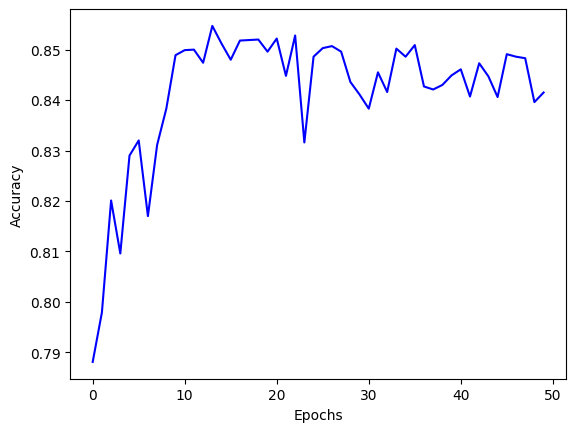

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
 
(train_images, train_labels), (test_images, test_labels) = load_data()
print(train_image.shape)
print(train_label.shape)
print(test_image.shape)
print(test_label.shape)

#Define a very simple NN
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="sigmoid")
])

#Define a batch generator
def batch_generator(image, label, batchsize):
    N = len(image)
    i = 0
    while True:
        yield image[i:i+batchsize], label[i:i+batchsize]
        i = i + batchsize
        if i + batchsize > N:
            i = 0
#Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="sparse_categorical_accuracy")
history = model.fit(batch_generator(train_image, train_label, 32),
                    steps_per_epoch=len(train_image)//32,
                    epochs=50, validation_data=(test_image, test_label), verbose=0)
print(model.evaluate(test_image, test_label))
 
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()